In [10]:
# import all libraries here

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

import joblib

In [11]:
# loading the complete and abridged dataframes

df = joblib.load('../data/jlib_files/dataframes/modelling_df_1_cleaning.jlib')
df_vis = joblib.load('../data/jlib_files/dataframes/complete_df_1_cleaning.jlib')

In [12]:
# creating a new TFL Zone column with object data types for visualisations

df_vis['tfl_zone_object'] = df_vis.tfl_zone.apply(lambda x: 'Zone ' + str(x))

# Exploratory Data Analysis

## Price

As the histogram below details, the distribution of the property prices is heavily skewed to the right. The majority of prices fall between £20 and slightly over £100, yet there are clusters of expensive properties that rise up to the artificial price limit of £100.

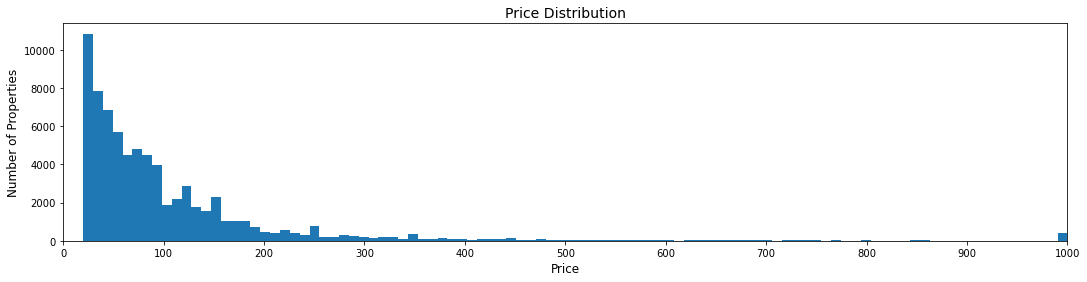

In [13]:
fig,ax = plt.subplots(figsize=(18,4))

ax.hist(df.price, bins=100)
ax.margins(x=0)
ax.set_xlabel('Price',fontsize=12)
ax.set_ylabel('Number of Properties',fontsize=12)
ax.set_xticks(range(0,1001, 100))
ax.set_title('Price Distribution',fontsize=14)

plt.show()

The boxplot here gives an idea of how many outliers there are beyond the outer whisker at approximately £240. 

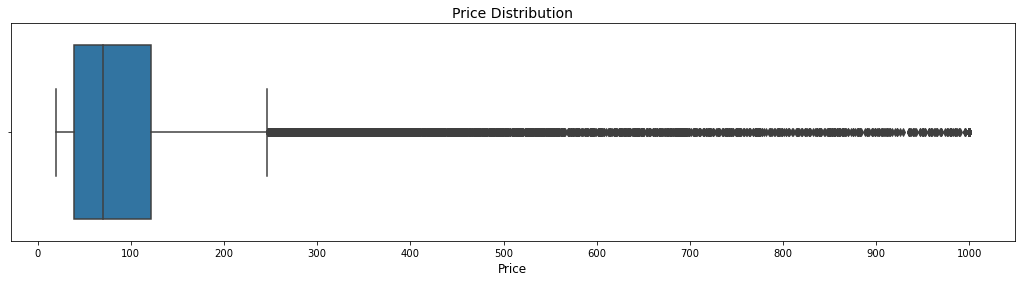

In [14]:
fig,ax = plt.subplots(figsize=(18,4))

sns.boxplot(x=df.price)

ax.set_xlabel('Price',fontsize=12)
ax.set_xticks(range(0,1001, 100))
ax.set_title('Price Distribution',fontsize=14)

plt.show()

### Aggregate values of numerical variables

In [15]:
describe_variables = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'calculated_host_listings_count',
                     'distance_from_center', 'station_distance', 'mean_monthly_rent', 'name_length',
                     'description_length', 'neighborhood_overview_length', 'host_about_length']

df[describe_variables].describe().T.iloc[:,1:]

,mean,std,min,25%,50%,75%,max
accommodates,3.002522,1.916181,1.000000,2.000000,2.000000,4.000000,16.000000
bathrooms,1.251506,0.572731,0.500000,1.000000,1.000000,1.000000,17.000000
bedrooms,1.465937,0.858498,1.000000,1.000000,1.000000,2.000000,22.000000
beds,1.712093,1.228469,1.000000,1.000000,1.000000,2.000000,38.000000
price,105.941143,126.989944,20.000000,39.000000,70.000000,122.000000,1000.000000
calculated_host_listings_count,28.106128,111.625202,1.000000,1.000000,1.000000,4.000000,861.000000
distance_from_center,7.241909,4.493219,0.017436,4.148304,6.086199,9.455120,29.311408
station_distance,0.725411,0.919740,0.001587,0.290835,0.470464,0.768426,11.349528
mean_monthly_rent,1471.515909,311.658425,859.000000,1282.000000,1461.000000,1633.000000,2611.000000
name_length,6.466073,2.029768,0.000000,5.000000,7.000000,8.000000,45.000000


### Histogram distributions of quantitative variables 

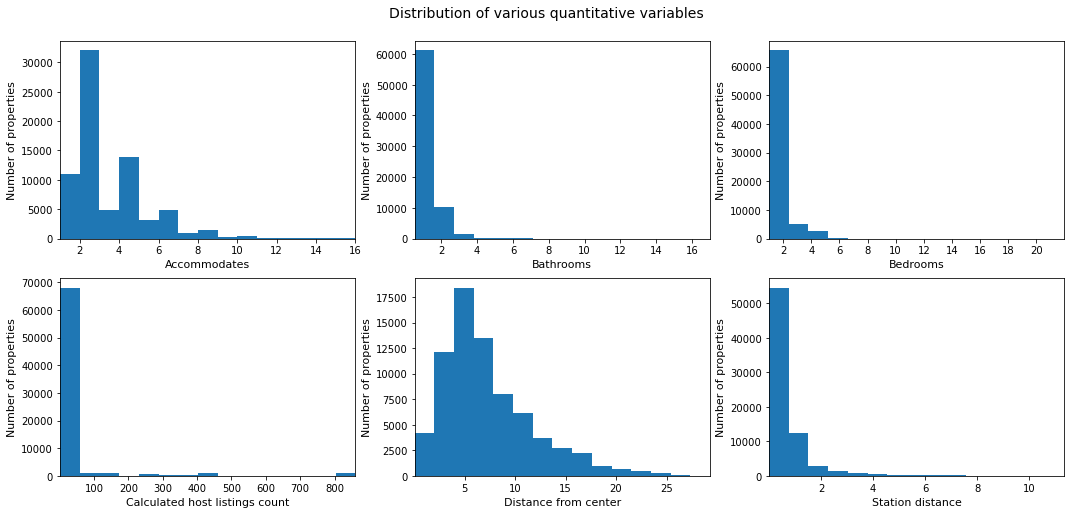

In [16]:
quantitative_variables = ['accommodates', 'bathrooms', 'bedrooms', 'calculated_host_listings_count',
                         'distance_from_center', 'station_distance']

fig,ax = plt.subplots(2, 3, figsize=(18,8))

counter = 0

for r in range(2):
    for c in range(3):
        
        column = quantitative_variables[counter]
        title = column.replace('_',' ').capitalize()
        
        ax[r,c].hist(df[column], bins=15)
        
        ax[r,c].set_xlabel(title, fontsize=(11))
        ax[r,c].set_ylabel('Number of properties', fontsize=(11))
        ax[r,c].margins(x=0)
        
        counter += 1
        
ax[0,2].set_xticks(range(2,21,2))         

plt.suptitle('Distribution of various quantitative variables', y=0.94, size=14)
plt.show()

#### Notes:

- the majority of Airbnb properties in London are small, catering for 2-3 guests
- most properties are approximately 5-6km away from the centre (Trafalgar Square)
- you don't have to walk too far from most properties to the nearest train station!
- most hosts own a small number of properties, but there are some that own hundreds of properties

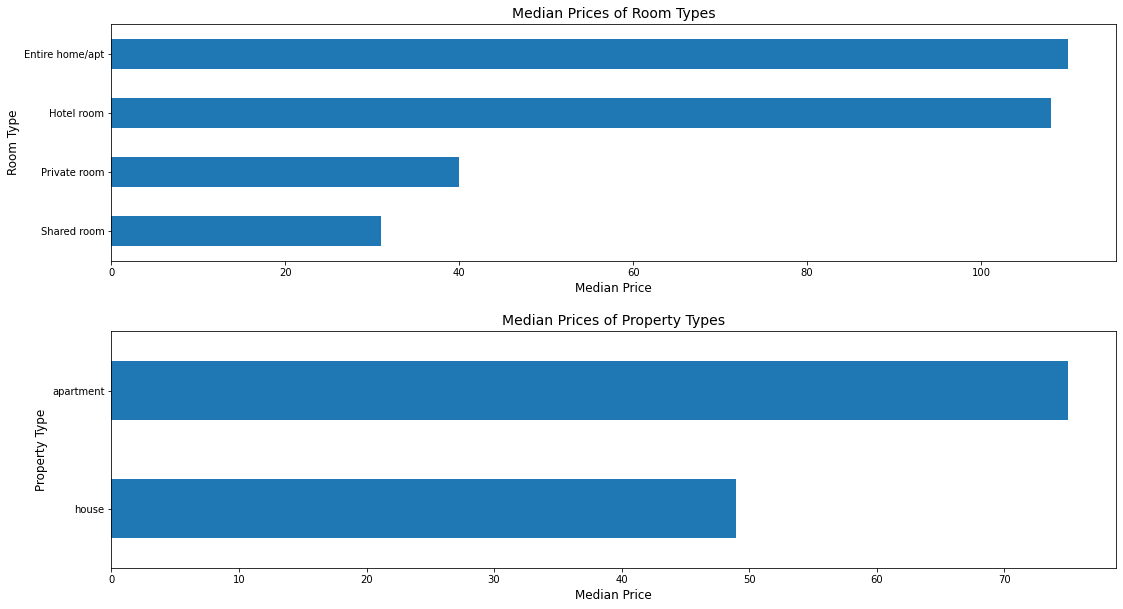

In [17]:
fig,ax = plt.subplots(2, figsize = (18,10))

df_vis.groupby('room_type').median()['price'].sort_values().plot.barh(ax=ax[0], ylabel='Room Type')
df_vis.groupby('property_type_basic').median()['price'].sort_values().plot.barh(ax=ax[1], ylabel='Property Type')

ax[0].set_title('Median Prices of Room Types', fontsize=14)
ax[1].set_title('Median Prices of Property Types', fontsize=14)

ax[0].set_ylabel('Room Type', fontsize=12)
ax[1].set_ylabel('Property Type', fontsize=12)

ax[0].set_xlabel('Median Price', fontsize=12)
ax[1].set_xlabel('Median Price', fontsize=12)

fig.subplots_adjust(hspace=0.3)

plt.show()

As expected, it costs a lot more to stay at an entire property or hotel room rather than a private or shared room. What's less expected, however, is that an apartment generally costs more than a house. My theory behind this statistic is that there are less houses in the centrally located, and most expensive, parts of London. The majority of Airbnb houses are located more on the outskirts of London where you are likely to pay less on average.

This is visualised in the third GeoPandas plot below showing the proportion of houses to apartments in London boroughs.

In [20]:
# creating the GeoPandas dataframe

map_df_vis = gpd.read_file('../data/csv_files/neighbourhoods.geojson')
map_df_vis.head()

,neighbourhood,neighbourhood_group,geometry
0,Kingston upon Thames,None,"MULTIPOLYGON (((-0.33068 51.32901, -0.33059 51..."
1,Croydon,None,"MULTIPOLYGON (((-0.06402 51.31864, -0.06407 51..."
2,Bromley,None,"MULTIPOLYGON (((0.01213 51.29960, 0.01196 51.2..."
3,Hounslow,None,"MULTIPOLYGON (((-0.24456 51.48870, -0.24468 51..."
4,Ealing,None,"MULTIPOLYGON (((-0.41183 51.53408, -0.41188 51..."


In [21]:
# Dropping the empty column
map_df_vis.drop('neighbourhood_group', axis=1, inplace=True)

# Creating a dataframe of listing counts and median price by borough
neighbourhood_df_vis = pd.DataFrame(df_vis.groupby('neighbourhood').size())
neighbourhood_df_vis.rename(columns={0: 'number_of_listings'}, inplace=True)
neighbourhood_df_vis['median_price'] = df_vis.groupby('neighbourhood').price.median().values

# Joining the dataframes
neighbourhood_map_df_vis = map_df_vis.set_index('neighbourhood').join(neighbourhood_df_vis)

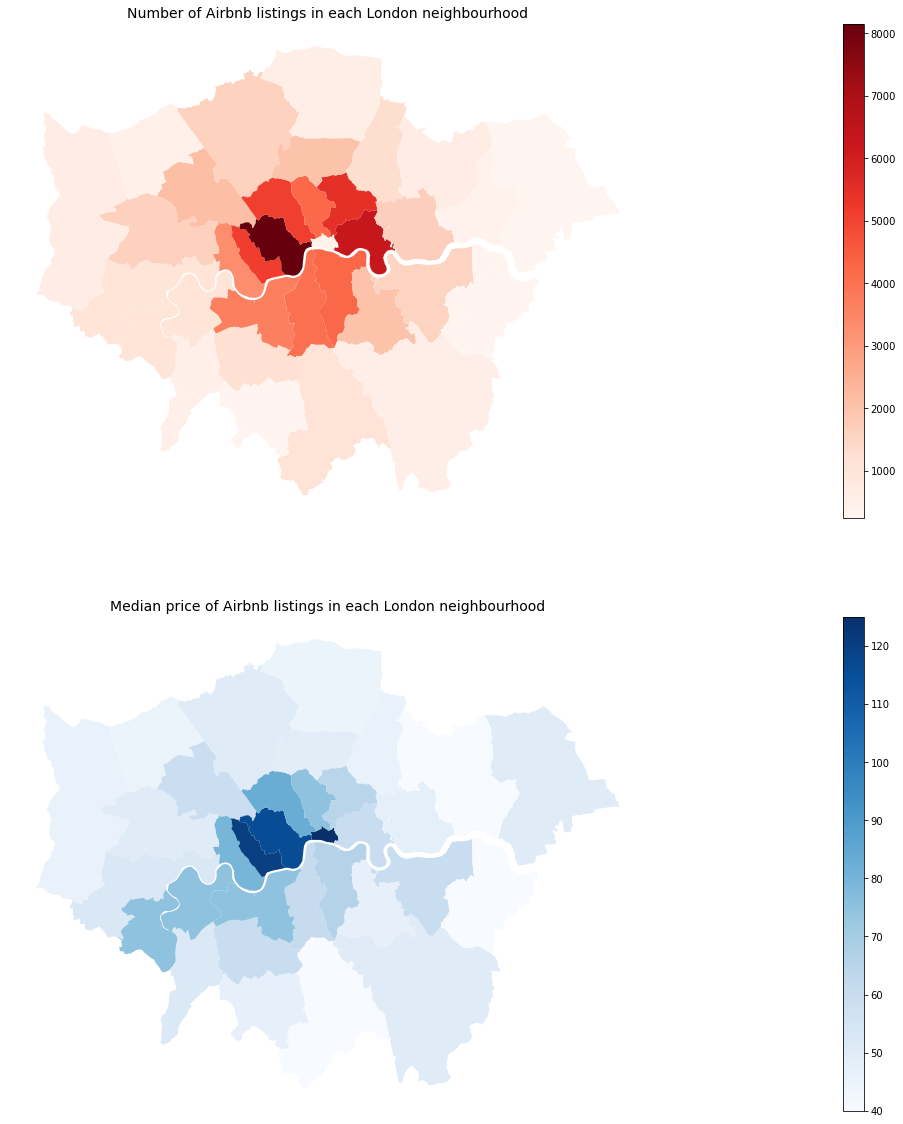

In [22]:
# Plotting the number of listings in each borough
fig, ax = plt.subplots(2,1, figsize=(20, 20))

divider0 = make_axes_locatable(ax[0])
cax0 = divider0.append_axes("right", size="2%", pad=0)

neighbourhood_map_df_vis.plot(column='number_of_listings', cmap='Reds', ax=ax[0], legend=True, cax=cax0)
ax[0].axis('off')
ax[0].set_title('Number of Airbnb listings in each London neighbourhood', fontsize=14)

divider1 = make_axes_locatable(ax[1])
cax1 = divider1.append_axes("right", size="2%", pad=0)

neighbourhood_map_df_vis.plot(column='median_price', cmap='Blues', ax=ax[1], legend=True, cax=cax1)
ax[1].axis('off')
ax[1].set_title('Median price of Airbnb listings in each London neighbourhood', fontsize=14)

plt.show()

Looking at the barplot below, we can see that the median prices for City of London, Kensington and Chelsea and Westminster are quite a lot higher than other neighbourhoods. It should be noted, though, that the City of London has one of the fewest amounts of Airbnb properties in London. I would imagine that this is partly because it is a business district and also partly because it is much smaller than other neighbourhoods. If you look at the red GeoPandas plot above, it is the small area of white in a sea of red in the centre of London.

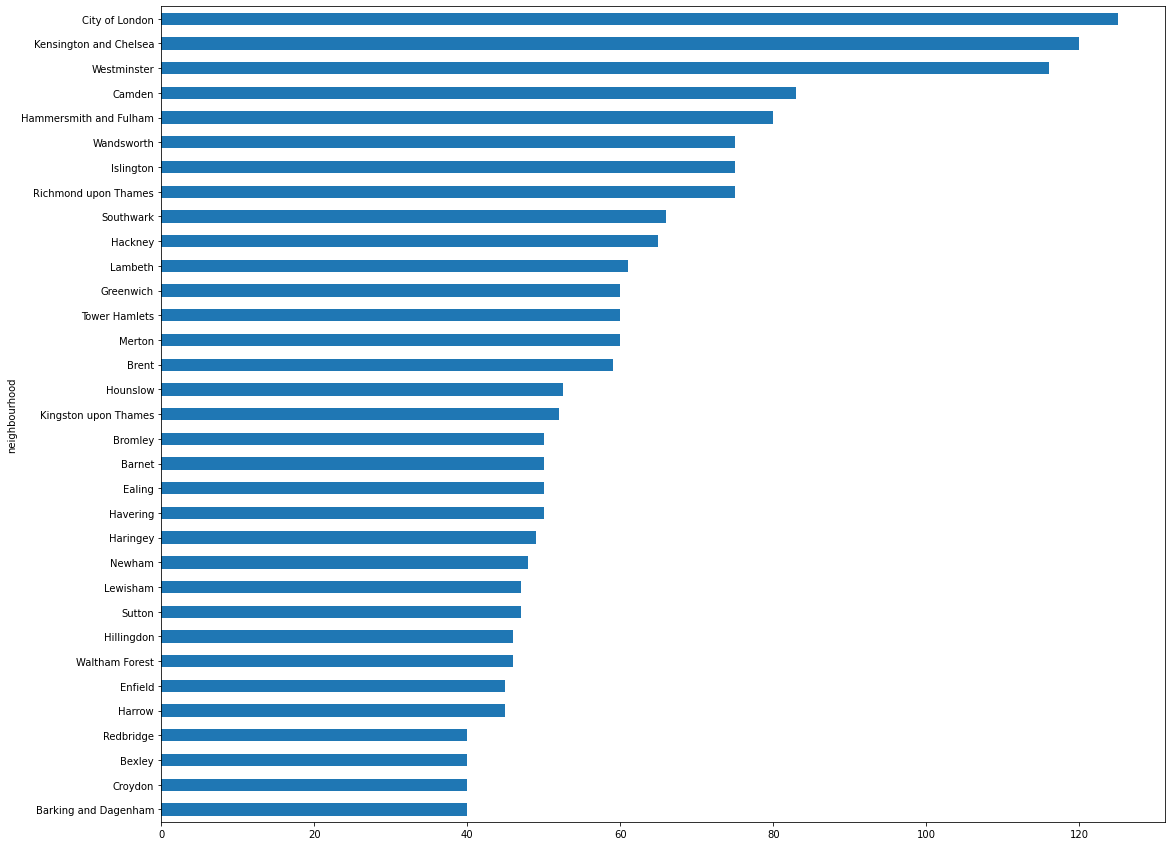

In [40]:
# dataframe of neighbourhoods ordered by their median price they have

fig,ax=plt.subplots(figsize=(18,15))

neighbourhood_map_df_vis.sort_values('median_price', ascending=True)['median_price'].plot.barh()

plt.show()

In [17]:
# adding data to the geopandas dataframe to look at the proportion of houses to apartments

neighbourhood_df_vis['house_ratio'] = df_vis.groupby('neighbourhood')['property_type_basic'].value_counts(normalize='all').unstack()['house']

house_ratio = df_vis.groupby('neighbourhood')['property_type_basic'].value_counts(normalize='all').unstack()['house']

neighbourhood_map_df_vis = neighbourhood_map_df_vis.join(house_ratio, how='left')

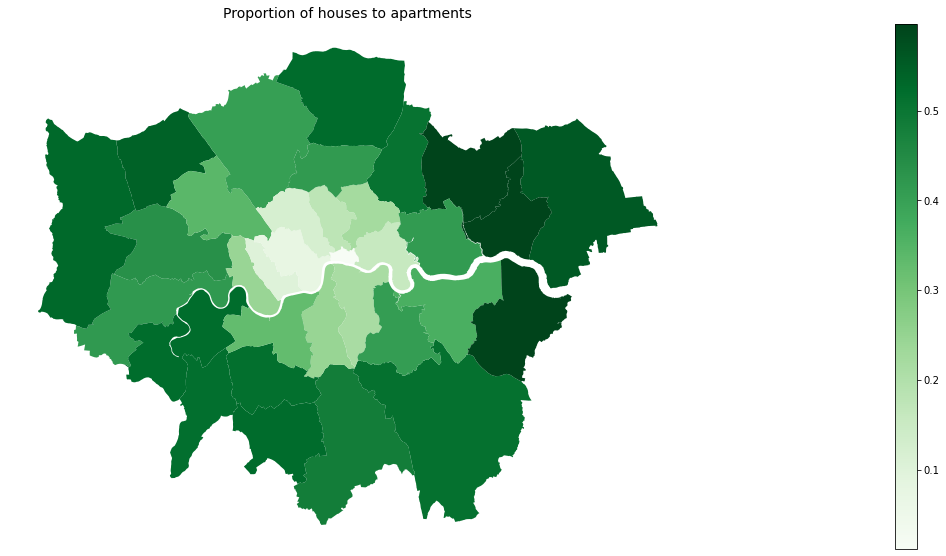

In [20]:
fig,ax = plt.subplots(figsize=(20,10))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0)

neighbourhood_map_df_vis.plot(column='house', cmap='Greens', ax=ax, legend=True, cax=cax)
ax.axis('off')
ax.set_title('Proportion of houses to apartments', fontsize=14)

plt.show()

In [10]:
neighbourhood_top_10 = df_vis.groupby('neighbourhood')['price'].median().sort_values(ascending=False).head(10).index
neighbourhood_bottom_10 = df_vis.groupby('neighbourhood')['price'].median().sort_values(ascending=False).tail(10).index

## Median Price Comparision for binary variables

In [21]:
amenities_variables = ['air_conditioning', 'bbq', 'baby_facilities', 'balcony_or_patio',
                       'bath', 'bed_linen', 'cable_tv', 'child_friendly', 'coffee_maker',
                       'cooking_facilities', 'dishwasher', 'garden', 
                       'has_workspace', 'host_greets_you', 'long_term_stays', 'luggage_dropoff',
                       'lock_on_bedroom_door', 'luxury_facilities', 'private_entrance',
                       'toiletries', 'tumble_dryer', 'tv']

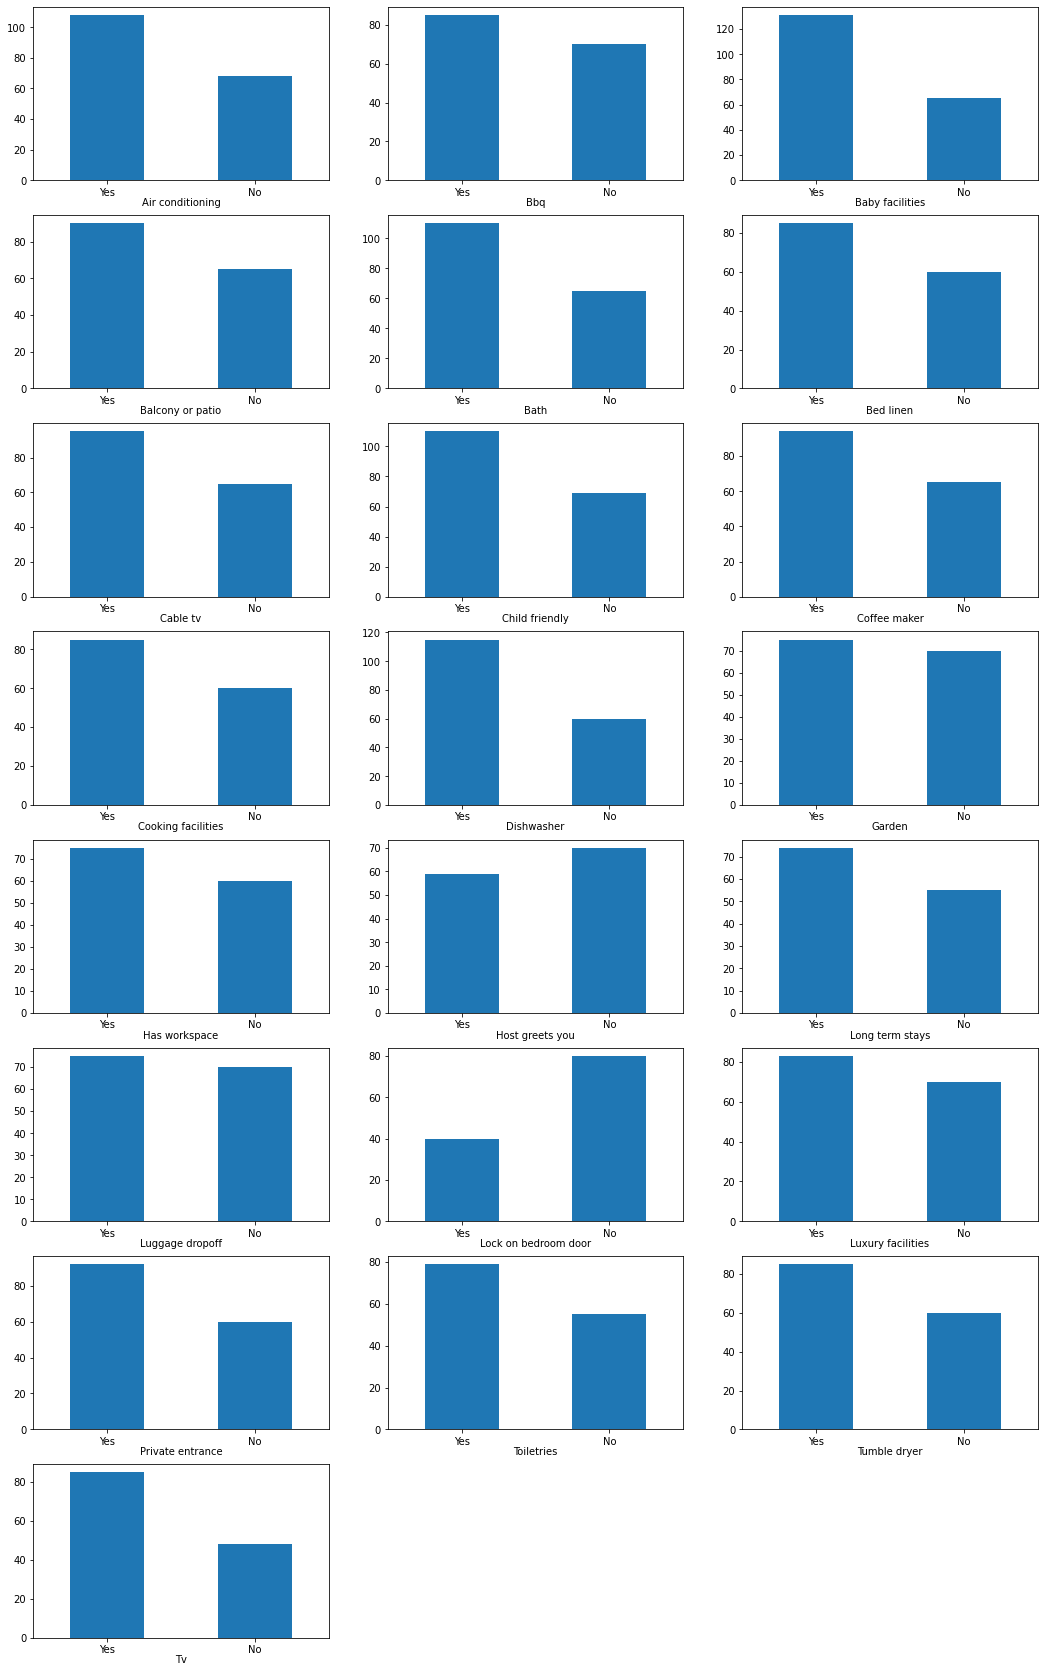

In [22]:
fig,ax = plt.subplots(8, 3, figsize=(18,30))

for ax_, amenity in zip(ax.flatten(), amenities_variables):
    
    x_label = amenity.replace('_', ' ').capitalize()
    
    df_vis.groupby(amenity).median()['price'].sort_index(ascending=False).plot.bar(ax=ax_)
    ax_.set_xticklabels(labels=['Yes', 'No'], rotation=0)
    ax_.set_xlabel(x_label, labelpad=0.2)

fig.delaxes(ax[7,1])
fig.delaxes(ax[7,2])
plt.show()

#### Notes

- some of the amenity categories are more useful than others!
- makes logical sense that properties with air conditioning, baby facilities or dishwashers are generally more expensive
- it's interesting, however, that properties where the host greets you are cheaper!

## Median price comparison for other categorical variables

In [23]:
other_categorical_binary = ['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
                           'host_has_profile_pic', 'host_identity_verified', 'instant_bookable',
                           'serviced_property', 'description_provided',
                           'neighborhood_overview_provided', 'host_about_provided']
other_categorical_non_binary = ['host_response_time', 'rail_network']

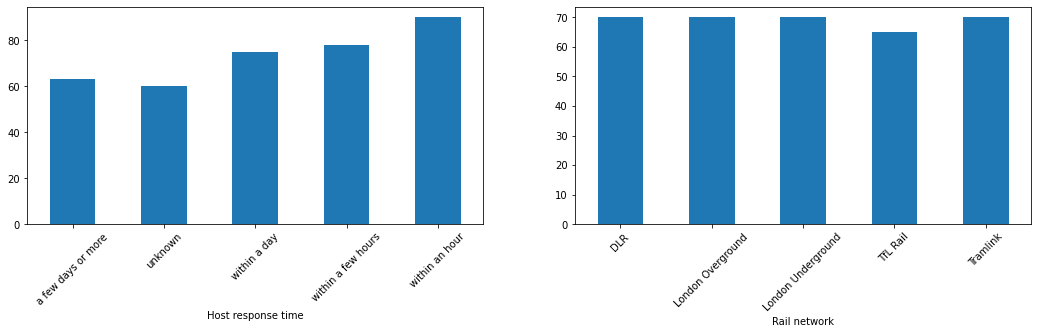

In [24]:
fig,ax = plt.subplots(1,2,figsize=(18,4))

for ax_, column in zip(ax.flatten(), other_categorical_non_binary):
    
    x_label = column.replace('_', ' ').capitalize()
    df_vis.groupby(column).median()['price'].plot.bar(ax=ax_,rot=45)
    ax_.set_xlabel(x_label)

plt.show()

#### Notes:

- there very little difference in median prices between properties with different rail networks
- the host response time, however, seems to be a good indicator of price - the quicker a host responds to a message, the more likely it is that their property has a higher price

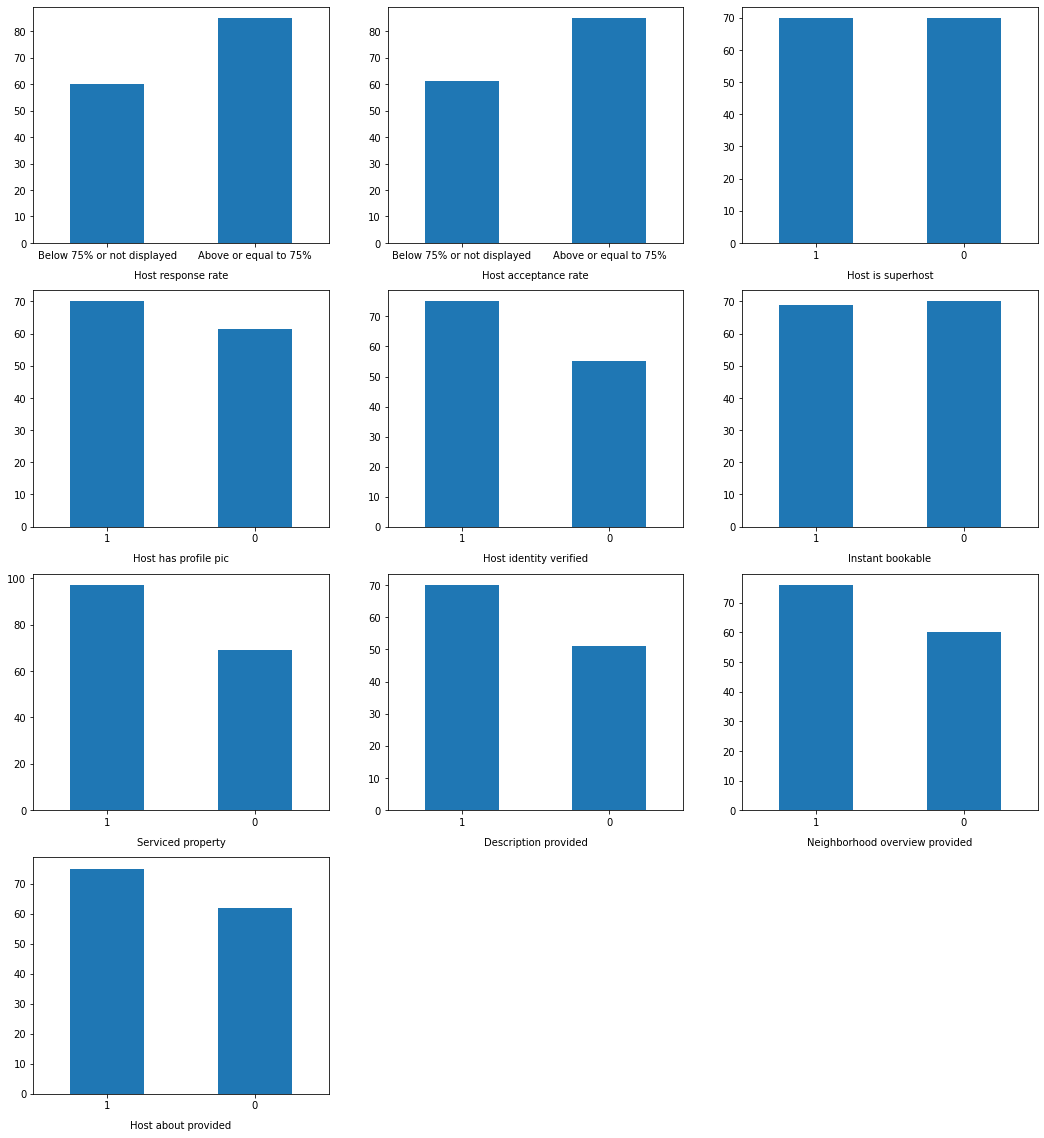

In [25]:
fig,ax = plt.subplots(4, 3, figsize=(18,20))

for ax_, column in zip(ax.flatten(), other_categorical_binary):
    
    x_label = column.replace('_', ' ').capitalize()
    
    df_vis.groupby(column).median()['price'].sort_index(ascending=False).plot.bar(ax=ax_,rot=0)
    ax_.set_xlabel(x_label, labelpad=10)

fig.delaxes(ax[3,1])
fig.delaxes(ax[3,2])
plt.show()

#### Notes:

- there is not much to discuss here, but we can see that being a superhost doesn't seem to suggest that a property costs more
- the same can be said for whether a property can be instantly booked

## Pairplots between quantitative variables

In [26]:
variables_continuous = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'calculated_host_listings_count', 
                        'distance_from_center', 'station_distance', 'mean_monthly_rent',
                        'name_length', 'description_length', 'neighborhood_overview_length', 'host_about_length']

quantitative_property = ['accommodates', 'bathrooms', 'bedrooms', 'beds']

quantitative_location = ['distance_from_center', 'station_distance', 'mean_monthly_rent']

quantitative_listing = ['calculated_host_listings_count', 'name_length',
                       'description_length', 'neighborhood_overview_length', 'host_about_length']

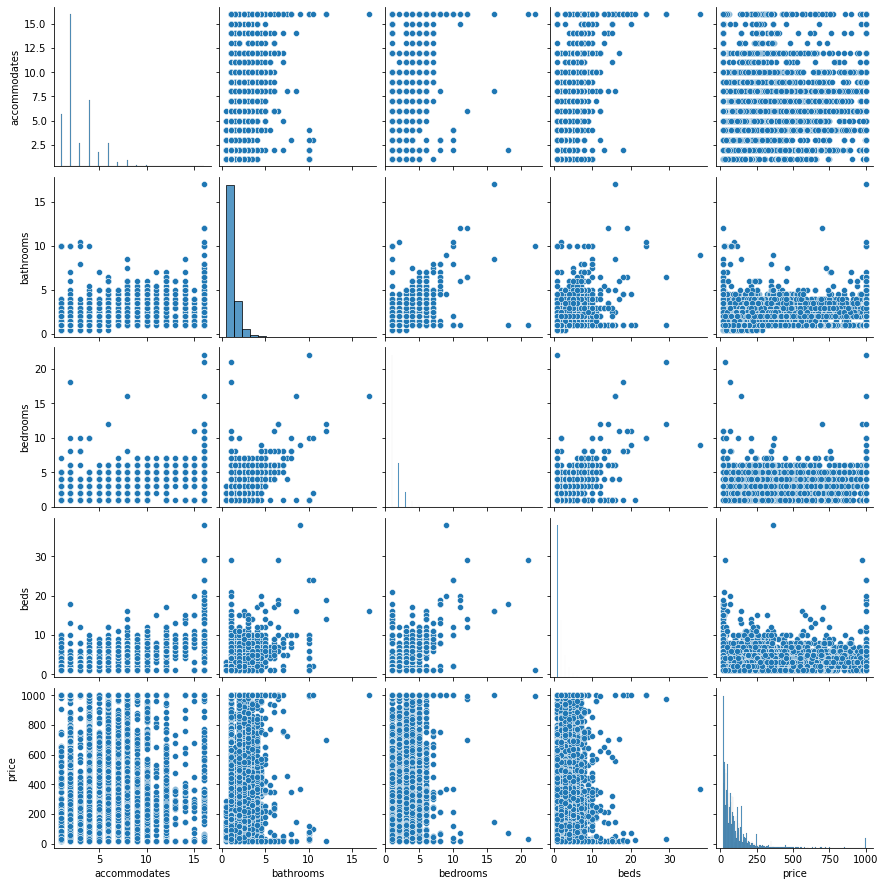

In [28]:
sns.pairplot(df_vis[quantitative_property +['price']])

plt.show()

#### Notes:

- concerningly, none of the predictor variables visually have any obvious correlation with the target variable
- they do, however, have a relatively strong correlation with each other
- this makes sense - the more people a property can acommodate, the more beds, bedrooms and bathrooms they're going to have

### Dealing with outliers

Let's look at a few outliers that this pairplot has highlighted.....

This property doesn't appear online when I enter the URL. Due to it being a massive outlier and seemingly incorrect price, I'm going to remove it from the dataset.

In [29]:
df_vis.drop(index=60337, inplace=True)
df.drop(index=60337, inplace=True)

In the below code, I'm correcting instances where hostels/dormitories list the entire amount of beds/bathrooms in the hostel, rather than what's available to the paying guest(s).

In [30]:
df_vis.loc[((df_vis.room_type=='Shared room')|df_vis.name.str.contains('dorm',case=False))&(df_vis.accommodates>=5),['accommodates','bathrooms']] = 1
df.loc[((df.room_type=='Shared room')|df.name.str.contains('dorm',case=False))&(df.accommodates>=5),['accommodates','bathrooms']] = 1

Amending further instances whereby a value seems to have been input incorrectly.

In [31]:
# amending an incorrect listing with high values

df_vis.loc[71043,['bathrooms', 'bedrooms', 'beds']] = 1
df.loc[71043,['bathrooms', 'bedrooms', 'beds']] = 1

In [32]:
# resolving edge cases where some hostel properties had an incorrect number of bathrooms

df_vis.loc[(df_vis.room_type=='Hotel room')&(df_vis.name.str.contains('dorm|hostel|hotel',case=False))&(df_vis.bathrooms==10),'bathrooms'] = 1
df.loc[(df.room_type=='Hotel room')&(df.name.str.contains('dorm|hostel|hotel',case=False))&(df.bathrooms==10),'bathrooms'] = 1

In [33]:
# property accommodates and has more bedrooms than in reality. Reverting to median

df_vis.loc[70490,'accommodates'] = 2
df.loc[70490,'accommodates'] = 2
df_vis.loc[70490,'bedrooms'] = 1
df.loc[70490,'bedrooms'] = 1

## Heatmap of variables

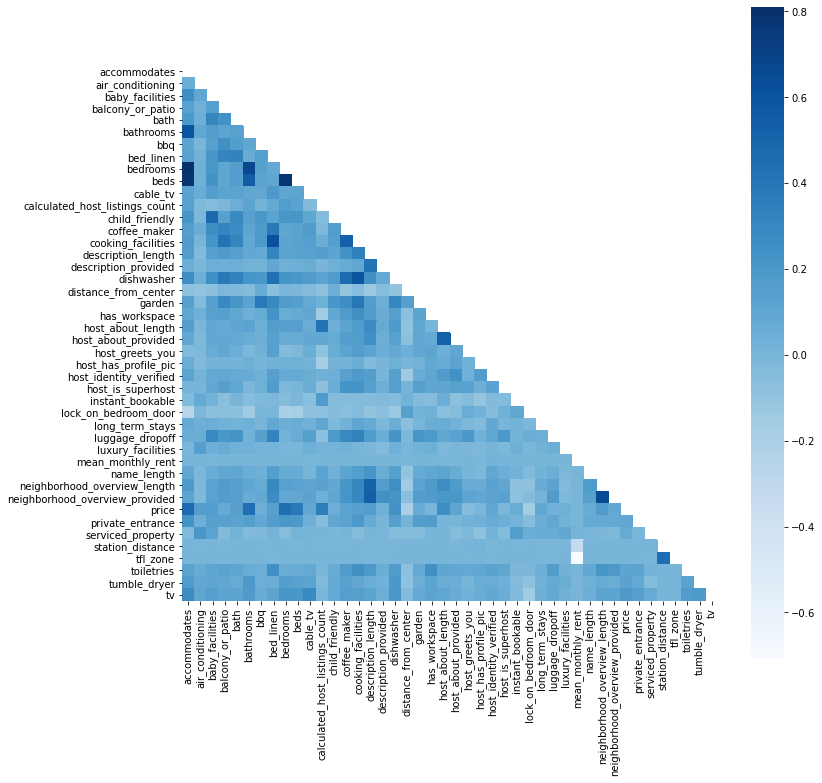

In [37]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(12,12))

sns.heatmap(df.reindex(sorted(df.columns), axis=1).corr(), mask=mask,square=True, cmap='Blues')

plt.show()

#### Notes:

- generally speaking, there aren't many instances whereby predictor variables are strongly correlated with one another
- even if they are, however, we shouldn't need to take any action as we can use regularisation to limit their effect for linear regression models

## Sorted correlation between target variable variables

In the below plot, I've dummified the categorical

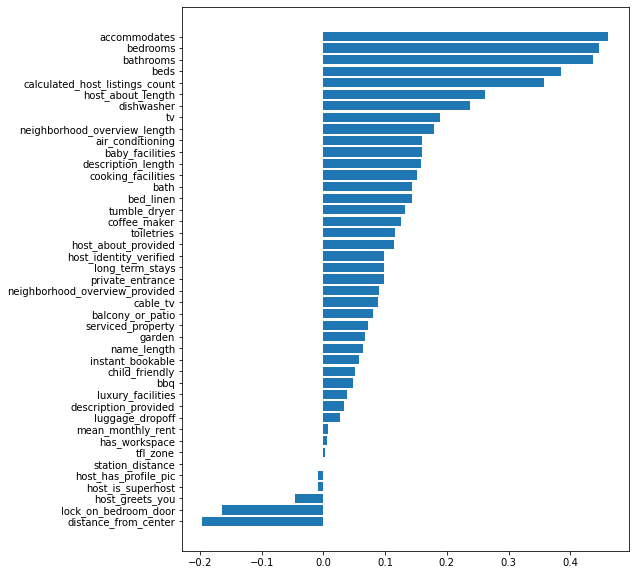

In [38]:
fig,ax = plt.subplots(figsize=(8,10))

correlation = df.corr()['price'].sort_values()
correlation.drop('price',inplace=True)

plt.barh(y=correlation.index, width=correlation)

plt.show()

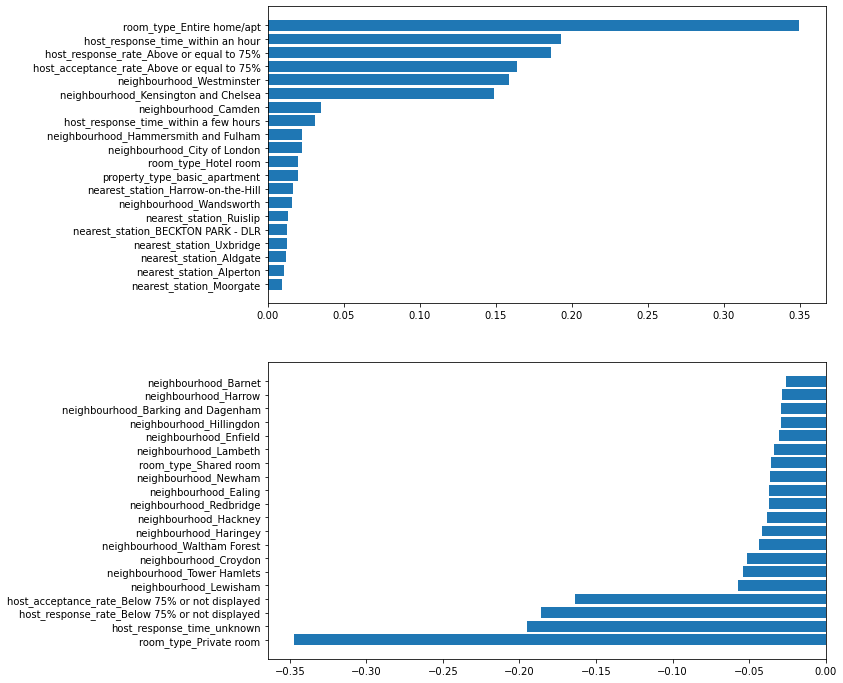

In [40]:
categorical_columns = ['host_response_time', 'host_response_rate', 'host_acceptance_rate',
 'neighbourhood', 'room_type', 'property_type_basic', 'nearest_station', 'rail_network']

df_vis_dum = pd.get_dummies(df_vis, columns=categorical_columns)
dummified_columns = [column for column in df_vis_dum.columns 
                     if any(cat_column in column for cat_column in categorical_columns)]

fig,ax = plt.subplots(2,1,figsize=(10,12))

dum_correlation = df_vis_dum[dummified_columns+['price']].corr()['price'].sort_values()
dum_correlation.drop('price',inplace=True)

ax[0].barh(y=dum_correlation[-20:].index, width=dum_correlation[-20:])
ax[1].barh(y=dum_correlation[:20].index, width=dum_correlation[:20])

plt.show()

Notes:

- complete markdown
- add titles for all plots

In [41]:
# dropping TFL Zone

df.drop('tfl_zone', axis=1, inplace=True)

# dropping neighbourhood_overview_length

df.drop('neighborhood_overview_provided', axis=1, inplace=True)

# dropping nearest_station, rail_network and postcode

df.drop(['nearest_station', 'rail_network', 'postcode'], axis=1, inplace=True)

In [43]:
# saving the adapted visualisation dataframe in case I'll need it later on

joblib.dump(df_vis, '../data/jlib_files/dataframes/complete_df_2_modelling.jlib')

['../data/jlib_files/dataframes/complete_df_2_modelling.jlib']

In [45]:
# saving adapted the dataframe for modelling

joblib.dump(df, '../data/jlib_files/dataframes/modelling_df_2_modelling.jlib')

['../data/jlib_files/dataframes/modelling_df_2_modelling.jlib']